In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('credit-risk-dataset.csv')
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [3]:
df.isnull().sum()

CheckingStatus              0
LoanDuration                0
CreditHistory               0
LoanPurpose                 0
LoanAmount                  0
ExistingSavings             0
EmploymentDuration          0
InstallmentPercent          0
Sex                         0
OthersOnLoan                0
CurrentResidenceDuration    0
OwnsProperty                0
Age                         0
InstallmentPlans            0
Housing                     0
ExistingCreditsCount        0
Job                         0
Dependents                  0
Telephone                   0
ForeignWorker               0
Risk                        0
dtype: int64

In [4]:
df['Risk'].value_counts()

Risk
No Risk    3330
Risk       1670
Name: count, dtype: int64

# One hot encoding

Output y

In [5]:
df['y'] = 0 
df.loc[df['Risk'] == 'Risk', 'y'] = 1
df.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk,y
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,32,none,own,1,skilled,1,none,yes,No Risk,0
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,37,stores,own,2,skilled,1,none,yes,No Risk,0
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,28,none,own,2,skilled,1,yes,no,No Risk,0
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,32,none,own,1,skilled,1,none,yes,No Risk,0
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,57,none,own,2,skilled,1,none,yes,Risk,1


Credit History

In [6]:
# Label encoding 
encoder = LabelEncoder()

# One hot encoding
encoder2 = OneHotEncoder()


In [7]:
df['CreditHistory'].value_counts()

CreditHistory
prior_payments_delayed    1686
credits_paid_to_date      1490
outstanding_credit         938
all_credits_paid_back      769
no_credits                 117
Name: count, dtype: int64

In [8]:
CreditHistory_encoded = encoder2.fit_transform(df[['CreditHistory']]).toarray()

ExistingSavings

In [9]:
df['ExistingSavings'].value_counts()

ExistingSavings
less_100        1856
100_to_500      1133
500_to_1000     1078
greater_1000     558
unknown          375
Name: count, dtype: int64

In [10]:
ExistingSavings_encoded = encoder.fit_transform(df[['ExistingSavings']]).reshape(-1,1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CheckingStatus

In [11]:
df['CheckingStatus'].value_counts()

CheckingStatus
no_checking    1993
less_0         1398
0_to_200       1304
greater_200     305
Name: count, dtype: int64

In [12]:
CheckingStatus_encoded = encoder.fit_transform(df[['CheckingStatus']]).reshape(-1,1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Housing

In [13]:
df['Housing'].value_counts()

Housing
own     3195
rent    1066
free     739
Name: count, dtype: int64

In [14]:
Housing_encoded = encoder2.fit_transform(df[['Housing']]).toarray()

Job

In [15]:
df['Job'].value_counts()

Job
skilled                     3400
unskilled                    673
management_self-employed     641
unemployed                   286
Name: count, dtype: int64

In [16]:
Job_encoded = encoder2.fit_transform(df[['Job']]).toarray()

# Visualizations

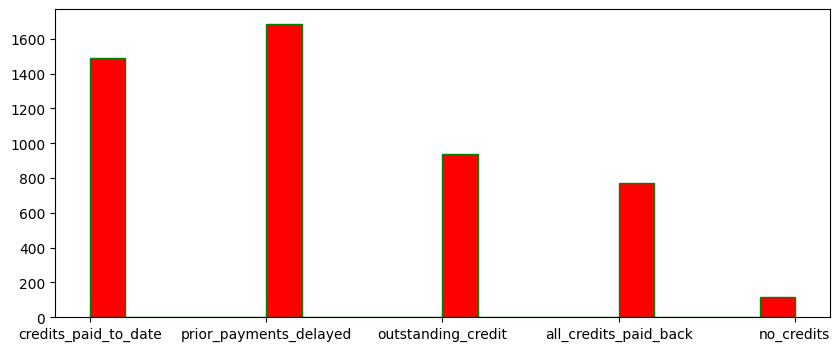

In [17]:
credit_history = df['CreditHistory']
plt.figure(figsize=(10,4))
plt.hist(credit_history, color = 'red' , edgecolor = 'green', bins=20)
plt.show()

# Convert Pandas dataframe to numpy arrays

In [18]:
df.columns

Index(['CheckingStatus', 'LoanDuration', 'CreditHistory', 'LoanPurpose',
       'LoanAmount', 'ExistingSavings', 'EmploymentDuration',
       'InstallmentPercent', 'Sex', 'OthersOnLoan', 'CurrentResidenceDuration',
       'OwnsProperty', 'Age', 'InstallmentPlans', 'Housing',
       'ExistingCreditsCount', 'Job', 'Dependents', 'Telephone',
       'ForeignWorker', 'Risk', 'y'],
      dtype='object')

category: CheckingStatus_encoded, CreditHistory_encoded, ExistingSavings_encoded, Housing_encoded, Job_encoded
<br>
quant: 'LoanDuration', 'LoanAmount', 'Age'

In [19]:
numerical_features = df[['LoanDuration','LoanAmount', 'Age']].values 
X = np.concatenate([CheckingStatus_encoded, CreditHistory_encoded, ExistingSavings_encoded, Housing_encoded, Job_encoded, numerical_features], axis=1)
print(type(X))

<class 'numpy.ndarray'>


In [20]:
y = df['y'].values
print(type(y))

<class 'numpy.ndarray'>


# Normalization

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) 
X[0:10]

array([[-1.49834983, -0.42632584,  1.53483051, -0.15479238, -0.48054212,
        -0.71326766, -1.39179319, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928,  0.8607091 ,
        -0.63953186, -0.36932715],
       [ 0.15181518, -0.42632584,  1.53483051, -0.15479238, -0.48054212,
        -0.71326766,  0.86224458, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928, -0.30398521,
        -1.21308861,  0.10026795],
       [ 0.15181518, -0.42632584, -0.65153774, -0.15479238, -0.48054212,
         1.40199824,  0.86224458, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928, -0.57276082,
        -1.29829817, -0.74500323],
       [-1.49834983, -0.42632584,  1.53483051, -0.15479238, -0.48054212,
        -0.71326766,  0.86224458, -0.41645344,  0.75162838, -0.52054877,
        -0.3834737 ,  0.68599434, -0.24631351, -0.39437928,  0.59193349,
         0.0855532 

# Split data into training and testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) 
print(f'Train set: {X_train.shape} , {y_train.shape}')
print(f'Test set: {X_test.shape} , {y_test.shape}')

Train set: (4000, 17) , (4000,)
Test set: (1000, 17) , (1000,)


# Model training

In [23]:
k = 3 
neigh = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=3)


# Prediction

In [24]:
yhat = neigh.predict(X_test) 
yhat[0:5]

array([1, 1, 0, 0, 0])

# Evaluate accuracy

In [25]:
print(f'Train set accuracy: {metrics.accuracy_score(y_train, neigh.predict(X_train))}')
print(f'Test set accuracy: {metrics.accuracy_score(y_test, yhat)}')

Train set accuracy: 0.852
Test set accuracy: 0.72
